## Milestone III: Exploratory Data Analysis 
### Team NPK

**Karina Huang, Nicholas Stern, Phoebe Wong**

----

This notebook visualizes our current available dataset. Specifically, we joined data from the Million Playlist Dataset with Spotify API audio features data. Due to rate limit and runtime reasons, we searched for online available Spotify API dataset at the current stage and ended up using data provided by https://github.com/teojinhowe/recsys-spotify. The Spotify API data provided by this repository is incomplete and covers only 76,502 unique songs. 

In [1]:
#importing packages
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#connect to database
db = sqlite3.connect('../raw_data/spotify.db')
cursor = db.cursor()

#initiate columns for table "trackPlus"
trackPlus_cols = [col[1] for col in cursor.execute("PRAGMA table_info(trackPlus)")]

#function to visualize queried data
#function by CS207 course lecture L19
#src: https://github.com/IACS-CS-207/cs207-F18/tree/master/lectures/L19
def viz_tables(cols, query):
    q = cursor.execute(query).fetchall()
    framelist = dict()
    for i, col_name in enumerate(cols):
        framelist[col_name] = [col[i] for col in q]
    return pd.DataFrame.from_dict(framelist)

In [3]:
#visualize table structure
query = '''SELECT * FROM trackPlus LIMIT 5'''
viz_tables(trackPlus_cols, query)

,Playlistid,Trackid,Artist_Name,Track_Name,Album_Name,Track_Duration,Artist_uri,Track_uri,Album_uri,acousticness,...,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,549000,0,Bob Dylan,Boots of Spanish Leather,The Times They Are A-Changin',277106,spotify:artist:74ASZWbe4lXaubB36ztrGX,spotify:track:6QHYEZlm9wyfXfEM1vSu1P,spotify:album:7DZeLXvr9eTVpyI1OlqtcS,0.926,...,False,4e-06,8,0.166,-17.285,1,0.0357,101.189,4,0.401
1,549000,1,Bob Dylan,Mr. Tambourine Man,Bringing It All Back Home,330533,spotify:artist:74ASZWbe4lXaubB36ztrGX,spotify:track:3RkQ3UwOyPqpIiIvGVewuU,spotify:album:1lPoRKSgZHQAYXxzBsOQ7v,0.794,...,False,0,5,0.379,-14.545,1,0.0676,177.515,4,0.584
2,549000,2,Loggins & Messina,Danny's Song,The Best: Loggins & Messina Sittin' In Again,254653,spotify:artist:7emRV8AluG3d4e5T0DZiK9,spotify:track:0ju1jP0cSPJ8tmojYBEI89,spotify:album:5BWgJaesMjpJWCTU9sgUPf,0.805,...,False,0,11,0.12,-12.193,0,0.0297,141.003,4,0.641
3,549000,3,Bob Dylan,A Hard Rain's A-Gonna Fall,The Freewheelin' Bob Dylan,412200,spotify:artist:74ASZWbe4lXaubB36ztrGX,spotify:track:7ny2ATvjtKszCpLpfsGnVQ,spotify:album:0o1uFxZ1VTviqvNaYkTJek,NaN,...,None,None,None,None,None,None,None,None,None,None
4,549000,4,Bob Dylan,Blowin' In the Wind,The Freewheelin' Bob Dylan,165426,spotify:artist:74ASZWbe4lXaubB36ztrGX,spotify:track:18GiV1BaXzPVYpp9rmOg0E,spotify:album:0o1uFxZ1VTviqvNaYkTJek,0.914,...,False,2.32e-05,2,0.0605,-20.567,1,0.0509,174.874,4,0.44


In [4]:
#check how many unique songs are with audio feature information and how many are without
trackPlus_cols = [col[1] for col in cursor.execute("PRAGMA table_info(trackPlus)")]
query = '''SELECT COUNT(DISTINCT Track_uri) as "with features"
           FROM trackPlus
           WHERE acousticness IS NOT NULL'''
display(viz_tables(['with features'], query))
query = '''SELECT COUNT(DISTINCT Track_uri) as "without features"
           FROM trackPlus
           WHERE acousticness IS NULL'''
display(viz_tables(['without features'], query))

,with features
0,76502


,without features
0,2185790


In [4]:
#read in meta data, csv generated in DB4S
df_meta = pd.read_csv('../raw_data/track_meta.csv')

df_meta.head()

#read in MPD data on playlists
df_MPD = pd.read_csv('../raw_data/MPD_Playlist.csv', index_col = 'Unnamed: 0')

df_MPD.head()

In [10]:
#select columns of interest from MPD
df_MPD_join = df_MPD.loc[:, ['Playlistid','Playlist','Album','Track','Artist']]

In [11]:
#join track meta data with playlist data
#this dataset refers to Track_Meta in our report
track_meta = df_meta.merge(df_MPD_join, on = 'Playlistid', how = 'left')

In [12]:
track_meta.head()

,Playlistid,Trackid,Artist_Name,Track_Name,Album_Name,Track_Duration,Artist_uri,Track_uri,Album_uri,acousticness,...,loudness,mode,speechiness,tempo,time_signature,valence,Playlist,Album,Track,Artist
0,0,0,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,226863,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,0.03110,...,-7.105,0.0,0.1210,125.461,4.0,0.810,Throwbacks,47,52,37
1,0,1,Britney Spears,Toxic,In The Zone,198800,spotify:artist:26dSoYclwsYLMAKD3tpOr4,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,0.02490,...,-3.914,0.0,0.1140,143.040,4.0,0.924,Throwbacks,47,52,37
2,0,2,Beyoncé,Crazy In Love,Dangerously In Love (Alben für die Ewigkeit),235933,spotify:artist:6vWDO969PvNqNYHIOW5v0m,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:album:25hVFAxTlDvXbx2X2QkUkE,0.00238,...,-6.583,0.0,0.2100,99.259,4.0,0.701,Throwbacks,47,52,37
3,0,3,Justin Timberlake,Rock Your Body,Justified,267266,spotify:artist:31TPClRtHm23RisEBtV3X7,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:album:6QPkyl04rXwTGlGlcYaRoW,0.20200,...,-6.055,0.0,0.1400,100.972,4.0,0.818,Throwbacks,47,52,37
4,0,4,Shaggy,It Wasn't Me,Hot Shot,227600,spotify:artist:5EvFsr3kj42KNv97ZEnqij,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:album:6NmFmPX56pcLBOFMhIiKvF,0.05610,...,-4.596,1.0,0.0713,94.759,4.0,0.654,Throwbacks,47,52,37


In [13]:
#save as csv 
track_meta.to_csv('meta_join_mpd.csv')

In [29]:
#output number of unique tracks covered in meta data
print('Number of playlists: ', len(df_meta.Playlistid.unique()))

Number of playlists:  268600


In [177]:
#drop nans
track_meta_dropna = track_meta.dropna()

In [34]:
#summarize track data without na, unit as playlist
track_meta_summary = track_meta_dropna.groupby(['Playlistid']).agg({
    'Trackid': len,
    'Track': np.mean,#this should be the same as 'Trackid'
    'Album': np.mean,
    'Artist': np.mean,
    'Track_Duration': np.median,
    'acousticness': np.median,
    'danceability': np.median,
    'energy': np.median,
    'instrumentalness': np.median,
    'key': np.median,
    'liveness': np.median,
    'loudness': np.median,
    'mode': np.median,
    'speechiness': np.median,
    'tempo': np.median,
    'valence': np.median
}).reset_index()#reset index to add column 'Playlistid' back to data frame

In [39]:
#function to identify incomplete playlists
def findEqual(x):
    if x[0] == x[1]:
        return True
    else:
        return False

track_meta_summary['checkEqual'] = track_meta_summary.loc[:, ['Trackid','Track']].apply(lambda x: findEqual(x), axis = 1)
track_meta_summary.head()

,Playlistid,Trackid,Track,Album,Artist,Track_Duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,checkEqual
0,0,52,52,47,37,221086.5,0.0294,0.6940,0.7985,0.000000,4.0,0.147,-4.7620,1.0,0.07450,119.9905,0.6920,True
1,1,39,39,23,21,285133.0,0.0765,0.4940,0.6770,0.006340,4.0,0.152,-8.1280,1.0,0.04460,120.0050,0.5090,True
2,2,64,64,51,31,220418.5,0.2035,0.6965,0.7250,0.000000,5.0,0.129,-4.4180,1.0,0.06315,108.5870,0.5710,True
3,3,126,126,107,86,221085.0,0.1045,0.5120,0.6625,0.008205,4.0,0.127,-8.8255,1.0,0.04455,125.1810,0.4385,True
4,4,17,17,16,16,258773.0,0.0704,0.5770,0.6700,0.000011,2.0,0.104,-6.8870,1.0,0.03680,119.3370,0.4980,True


In [42]:
#incomplete playlists 
false = track_meta_summary[track_meta_summary['checkEqual'] == False]

In [43]:
#subset complete playlists
track_meta_summary_clean = track_meta_summary[track_meta_summary['checkEqual'] == True]

In [44]:
#check shape of track meta cleaned
track_meta_summary_clean.shape

(27016, 18)

In [46]:
#this dataset refers to 'Track_Meta_Cleaned' in our report
track_meta_milestone3 = track_meta[track_meta['Playlistid'].isin(track_meta_summary_clean['Playlistid'].unique())]

In [49]:
#save dataset to csv
track_meta_milestone3.to_csv('track_meta_milestone3.csv')

In [50]:
#summarize Track Meta Cleaned, unit as playlist
track_meta_summary = track_meta_milestone3.groupby(['Playlistid']).agg({
    'Trackid': len,
    'Track': np.mean,#this should be the same as 'Trackid'
    'Album': np.mean,
    'Artist': np.mean,
    'Track_Duration': np.median,
    'acousticness': np.median,
    'danceability': np.median,
    'energy': np.median,
    'instrumentalness': np.median,
    'key': np.median,
    'liveness': np.median,
    'loudness': np.median,
    'mode': np.median,
    'speechiness': np.median,
    'tempo': np.median,
    'valence': np.median
}).reset_index()#reset index to add column 'Playlistid' back to data frame

In [51]:
#check summary of Track Meta Cleaned
track_meta_summary.head()

,Playlistid,Trackid,Track,Album,Artist,Track_Duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0,52,52,47,37,221086.5,0.0294,0.6940,0.7985,0.000000,4.0,0.147,-4.7620,1.0,0.07450,119.9905,0.6920
1,1,39,39,23,21,285133.0,0.0765,0.4940,0.6770,0.006340,4.0,0.152,-8.1280,1.0,0.04460,120.0050,0.5090
2,2,64,64,51,31,220418.5,0.2035,0.6965,0.7250,0.000000,5.0,0.129,-4.4180,1.0,0.06315,108.5870,0.5710
3,3,126,126,107,86,221085.0,0.1045,0.5120,0.6625,0.008205,4.0,0.127,-8.8255,1.0,0.04455,125.1810,0.4385
4,4,17,17,16,16,258773.0,0.0704,0.5770,0.6700,0.000011,2.0,0.104,-6.8870,1.0,0.03680,119.3370,0.4980


In [52]:
#summarize the summary data, grouped by number of tracks on album
track_plot = track_meta_summary.groupby(['Track']).agg({
    'Playlistid': len, #frequency of playlist with n number of tracks
    'Album': np.median, #median number of albums that cover n number of tracks
    'Artist': np.median, #median number of artists that are covered by n number of tracks
    'Track_Duration': np.median, 
    'acousticness': np.median, 
    'danceability': np.median,
    'energy': np.median,
    'instrumentalness': np.median,
    'key': np.median,
    'liveness': np.median,
    'loudness': np.median,
    'mode': np.median,
    'speechiness': np.median,
    'tempo': np.median,
    'valence': np.median    
}).reset_index()

In [70]:
#check data distribution of summarized data
track_plot.describe()

,Track,Playlistid,Album,Artist,Track_Duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,124.113445,113.512605,91.451681,63.552521,223283.577731,0.090366,0.650335,0.691188,0.000028,5.203782,0.128918,-5.987060,0.997899,0.063626,121.701140,0.513250
std,69.655207,200.812227,47.955398,31.899539,6272.318748,0.063224,0.047003,0.051080,0.000218,0.363797,0.010473,0.597633,0.032410,0.021400,2.816901,0.056033
min,5.000000,1.000000,5.000000,5.000000,186379.500000,0.000380,0.436000,0.306000,0.000000,4.000000,0.114500,-10.765000,0.500000,0.034450,114.505250,0.300000
25%,64.250000,4.000000,51.500000,41.000000,221149.125000,0.069450,0.634625,0.667000,0.000000,5.000000,0.124500,-6.158562,1.000000,0.055256,120.031062,0.484062
50%,123.500000,15.500000,94.000000,63.750000,222490.125000,0.077825,0.662000,0.691500,0.000000,5.000000,0.127500,-5.934500,1.000000,0.060100,121.039500,0.510250
75%,183.750000,96.750000,126.750000,83.750000,224912.687500,0.090406,0.673687,0.715563,0.000000,5.500000,0.131000,-5.651125,1.000000,0.065650,122.820750,0.548187
max,247.000000,789.000000,213.000000,158.000000,261758.500000,0.782500,0.757000,0.928000,0.002677,6.000000,0.258000,-4.428000,1.000000,0.203000,133.977000,0.804000


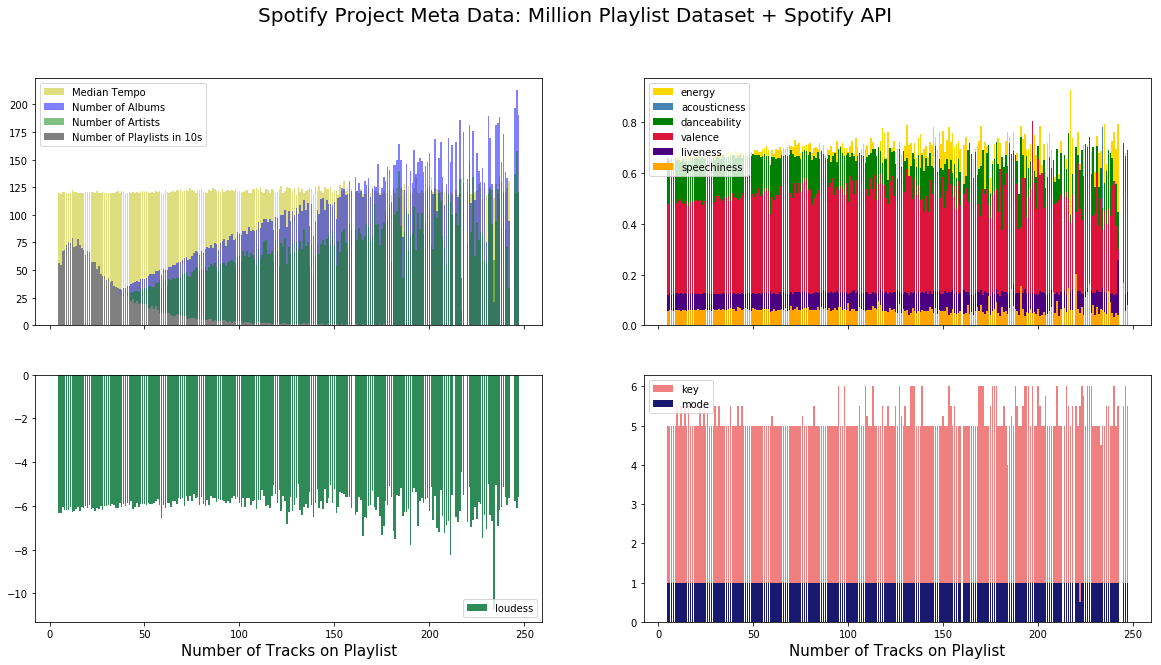

In [109]:
#visualize Track Meta Cleaned
cols = ['energy', 'acousticness', 'danceability', 'valence','liveness','speechiness']
colors = ['gold','steelblue','g','crimson','indigo','orange']
fig, (ax1, ax2) = plt.subplots(2, 2, figsize = (20, 10), sharex = True)
ax1[0].bar(track_plot['Track'], track_plot['tempo'], color = 'y', alpha = 0.5, label = 'Median Tempo')
ax1[0].bar(track_plot['Track'], track_plot['Album'], color = 'b', alpha = 0.5, label = 'Number of Albums')
ax1[0].bar(track_plot['Track'], track_plot['Artist'], color = 'g', alpha = 0.5, label = 'Number of Artists')
ax1[0].bar(track_plot['Track'], track_plot['Playlistid']/10, color = 'grey', label = 'Number of Playlists in 10s')
ax1[0].legend(fontsize = 10, loc = 2)

for i in range(len(cols)):
    ax1[1].bar(track_plot['Track'], track_plot[cols[i]], color = colors[i], label = cols[i])
ax1[1].legend(fontsize = 10, loc = 2)

ax2[0].bar(track_plot['Track'], track_plot['loudness'], color = 'seagreen', label = 'loudess')
ax2[0].legend(fontsize = 10, loc = 4)
ax2[0].set_xlabel('Number of Tracks on Playlist', fontsize = 15)

ax2[1].bar(track_plot['Track'], track_plot['key'], color = 'lightcoral', label = 'key')
ax2[1].bar(track_plot['Track'], track_plot['mode'], color = 'midnightblue', label = 'mode')
ax2[1].legend(fontsize = 10, loc = 2)
ax2[1].set_xlabel('Number of Tracks on Playlist', fontsize = 15)
plt.suptitle('Spotify Project Meta Data: Million Playlist Dataset + Spotify API', fontsize = 20)
plt.show()

In [110]:
#save figure for report
fig.savefig('meta_data.jpg')

In [116]:
#load Subset100
subset = pd.read_csv('../raw_data/track_meta_100subset_new.csv', index_col='Unnamed: 0')

In [140]:
#check data distribution in Subset100
subset.describe()

,Unnamed: 0.1,Playlistid,Trackid,Track_Duration,acousticness,artist_popularity,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Album,Track,Artist
count,3.079000e+03,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000
mean,9.383826e+06,141430.921728,24.724261,231110.976616,0.179124,74.487821,0.642737,0.667381,0.016271,5.137707,0.187531,-6.535065,0.644690,0.112890,122.456843,3.967847,0.520836,39.783696,50.448522,31.602468
std,5.693691e+06,85921.299098,24.255188,52566.233704,0.221431,12.999891,0.144650,0.178598,0.093602,3.664256,0.150499,2.766270,0.478685,0.112955,28.402454,0.280291,0.227985,29.566414,33.596464,23.376912
min,2.785700e+04,430.000000,0.000000,36400.000000,0.000006,0.000000,0.093000,0.006880,0.000000,0.000000,0.021000,-37.315000,0.000000,0.022500,60.048000,1.000000,0.028600,2.000000,5.000000,3.000000
25%,4.082020e+06,61388.000000,7.000000,201250.000000,0.019750,67.000000,0.547000,0.545000,0.000000,1.000000,0.092600,-7.816000,0.000000,0.039400,100.000000,4.000000,0.348000,18.000000,26.000000,16.000000
50%,1.034161e+07,155598.000000,17.000000,224386.000000,0.079600,75.000000,0.652000,0.690000,0.000000,5.000000,0.128000,-6.056000,1.000000,0.061600,120.462000,4.000000,0.514000,32.000000,39.000000,23.000000
75%,1.465391e+07,221044.000000,34.000000,254040.000000,0.255000,84.000000,0.743000,0.808000,0.000053,8.000000,0.241000,-4.619500,1.000000,0.138000,140.023000,4.000000,0.707000,53.000000,67.000000,42.000000
max,1.796832e+07,271274.000000,134.000000,669133.000000,0.977000,100.000000,0.978000,0.991000,0.944000,11.000000,0.966000,-0.698000,1.000000,0.808000,209.893000,5.000000,0.982000,121.000000,135.000000,91.000000


In [121]:
#Summarize Subset100 by Playlist
subset_summary_track = subset.groupby(['Playlistid']).agg({
    'Trackid': len,
    'acousticness': np.median,
    'danceability': np.median,
    'energy': np.median,
    'instrumentalness': np.median,
    'key': np.median,
    'liveness': np.median,
    'loudness': np.median,
    'mode': np.median,
    'speechiness': np.median,
    'tempo': np.median,
    'valence': np.median,
    'Album': np.mean,
    'Artist': np.mean
}).reset_index()

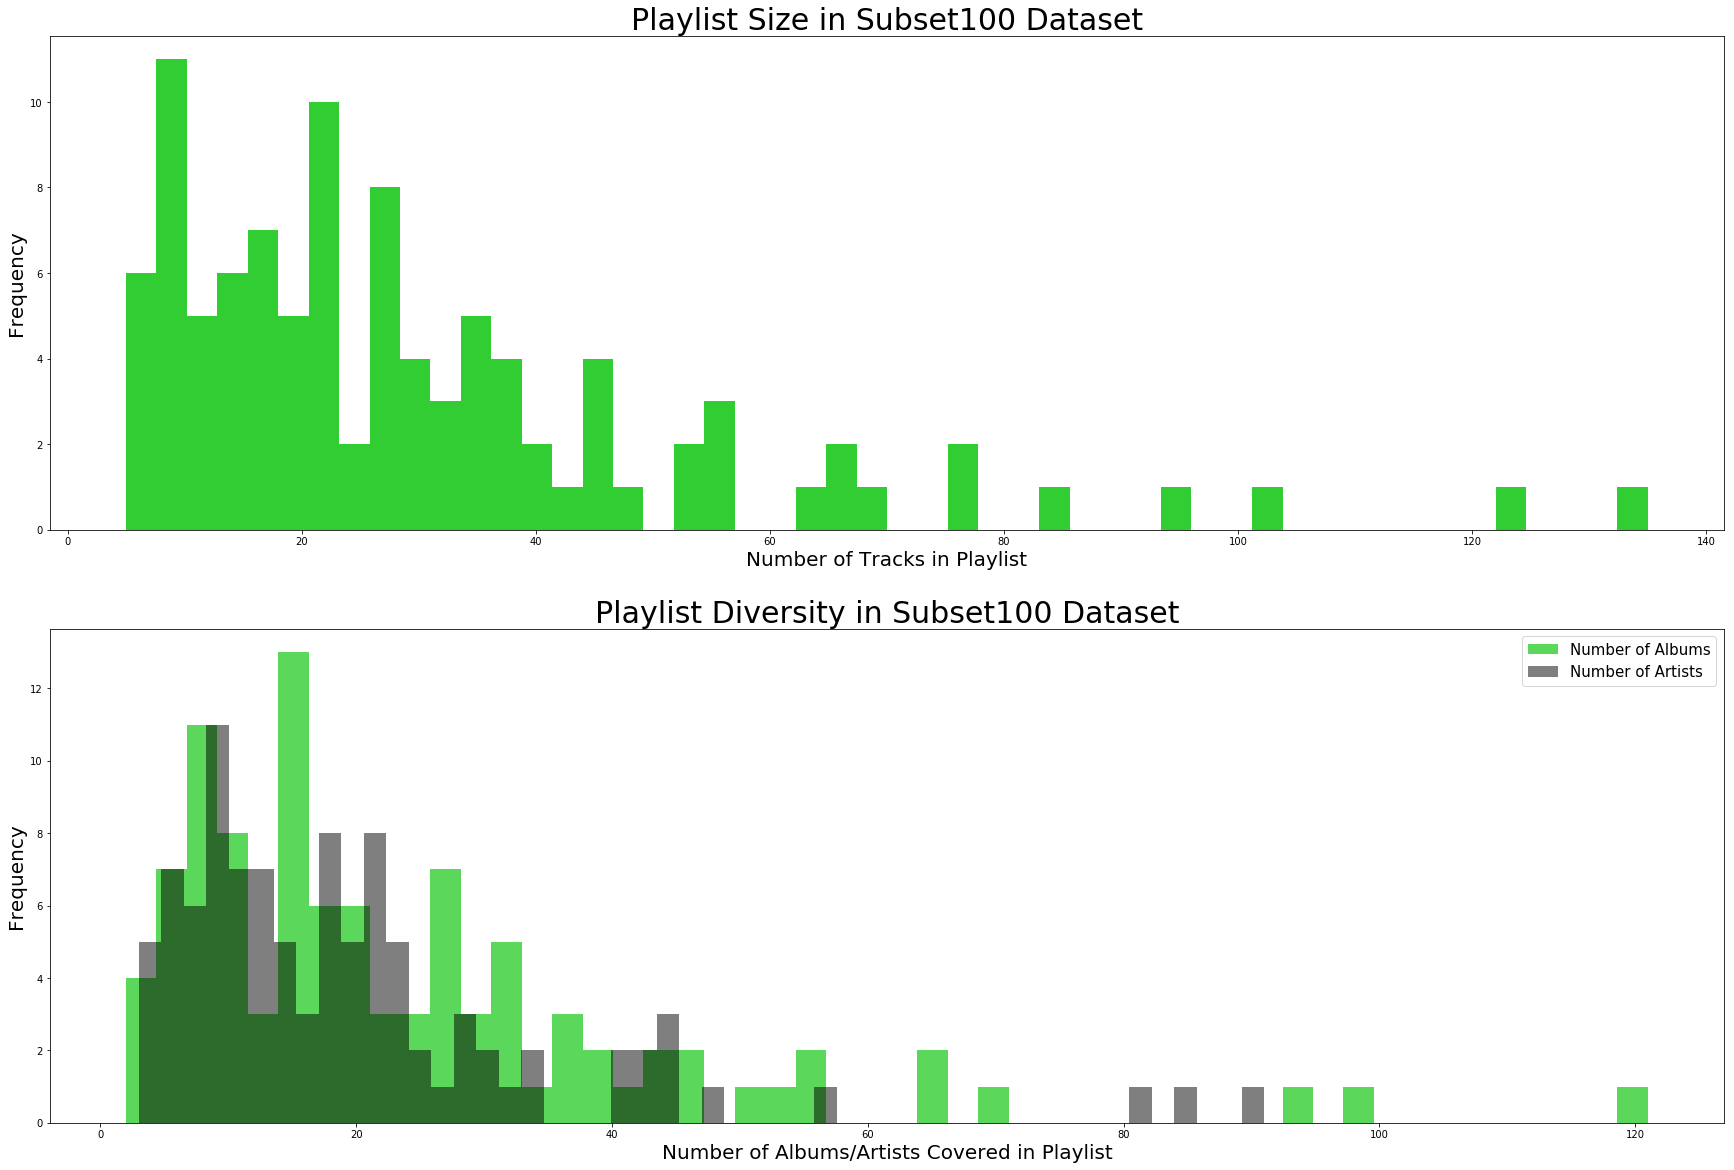

In [174]:
#Visualize Playlist Features in Subset100
fig2, (ax1,ax2) = plt.subplots(2,1,figsize = (30, 20))
ax1.hist(subset_summary_track['Trackid'],bins= 50,color = 'limegreen')
# ax1.set_xticks(range(1, 101, 1))
ax1.set_xlabel('Number of Tracks in Playlist', fontsize = 20)
ax1.set_ylabel('Frequency', fontsize = 20)
ax1.set_title('Playlist Size in Subset100 Dataset', fontsize = 30)
ax2.hist(subset_summary_track['Album'], bins = 50, color = 'limegreen', alpha = 0.8, label = 'Number of Albums')
ax2.hist(subset_summary_track['Artist'], bins = 50, color = 'black', alpha = 0.5, label = 'Number of Artists')
ax2.legend(fontsize = 15)
# ax2.set_xticks(range(1, 101, 1))
ax2.set_xlabel('Number of Albums/Artists Covered in Playlist', fontsize = 20)
ax2.set_ylabel('Frequency', fontsize = 20)
ax2.set_title('Playlist Diversity in Subset100 Dataset', fontsize = 30)
plt.show()

In [175]:
#save figure for report
fig2.savefig('Subset100_Playlist.jpg')

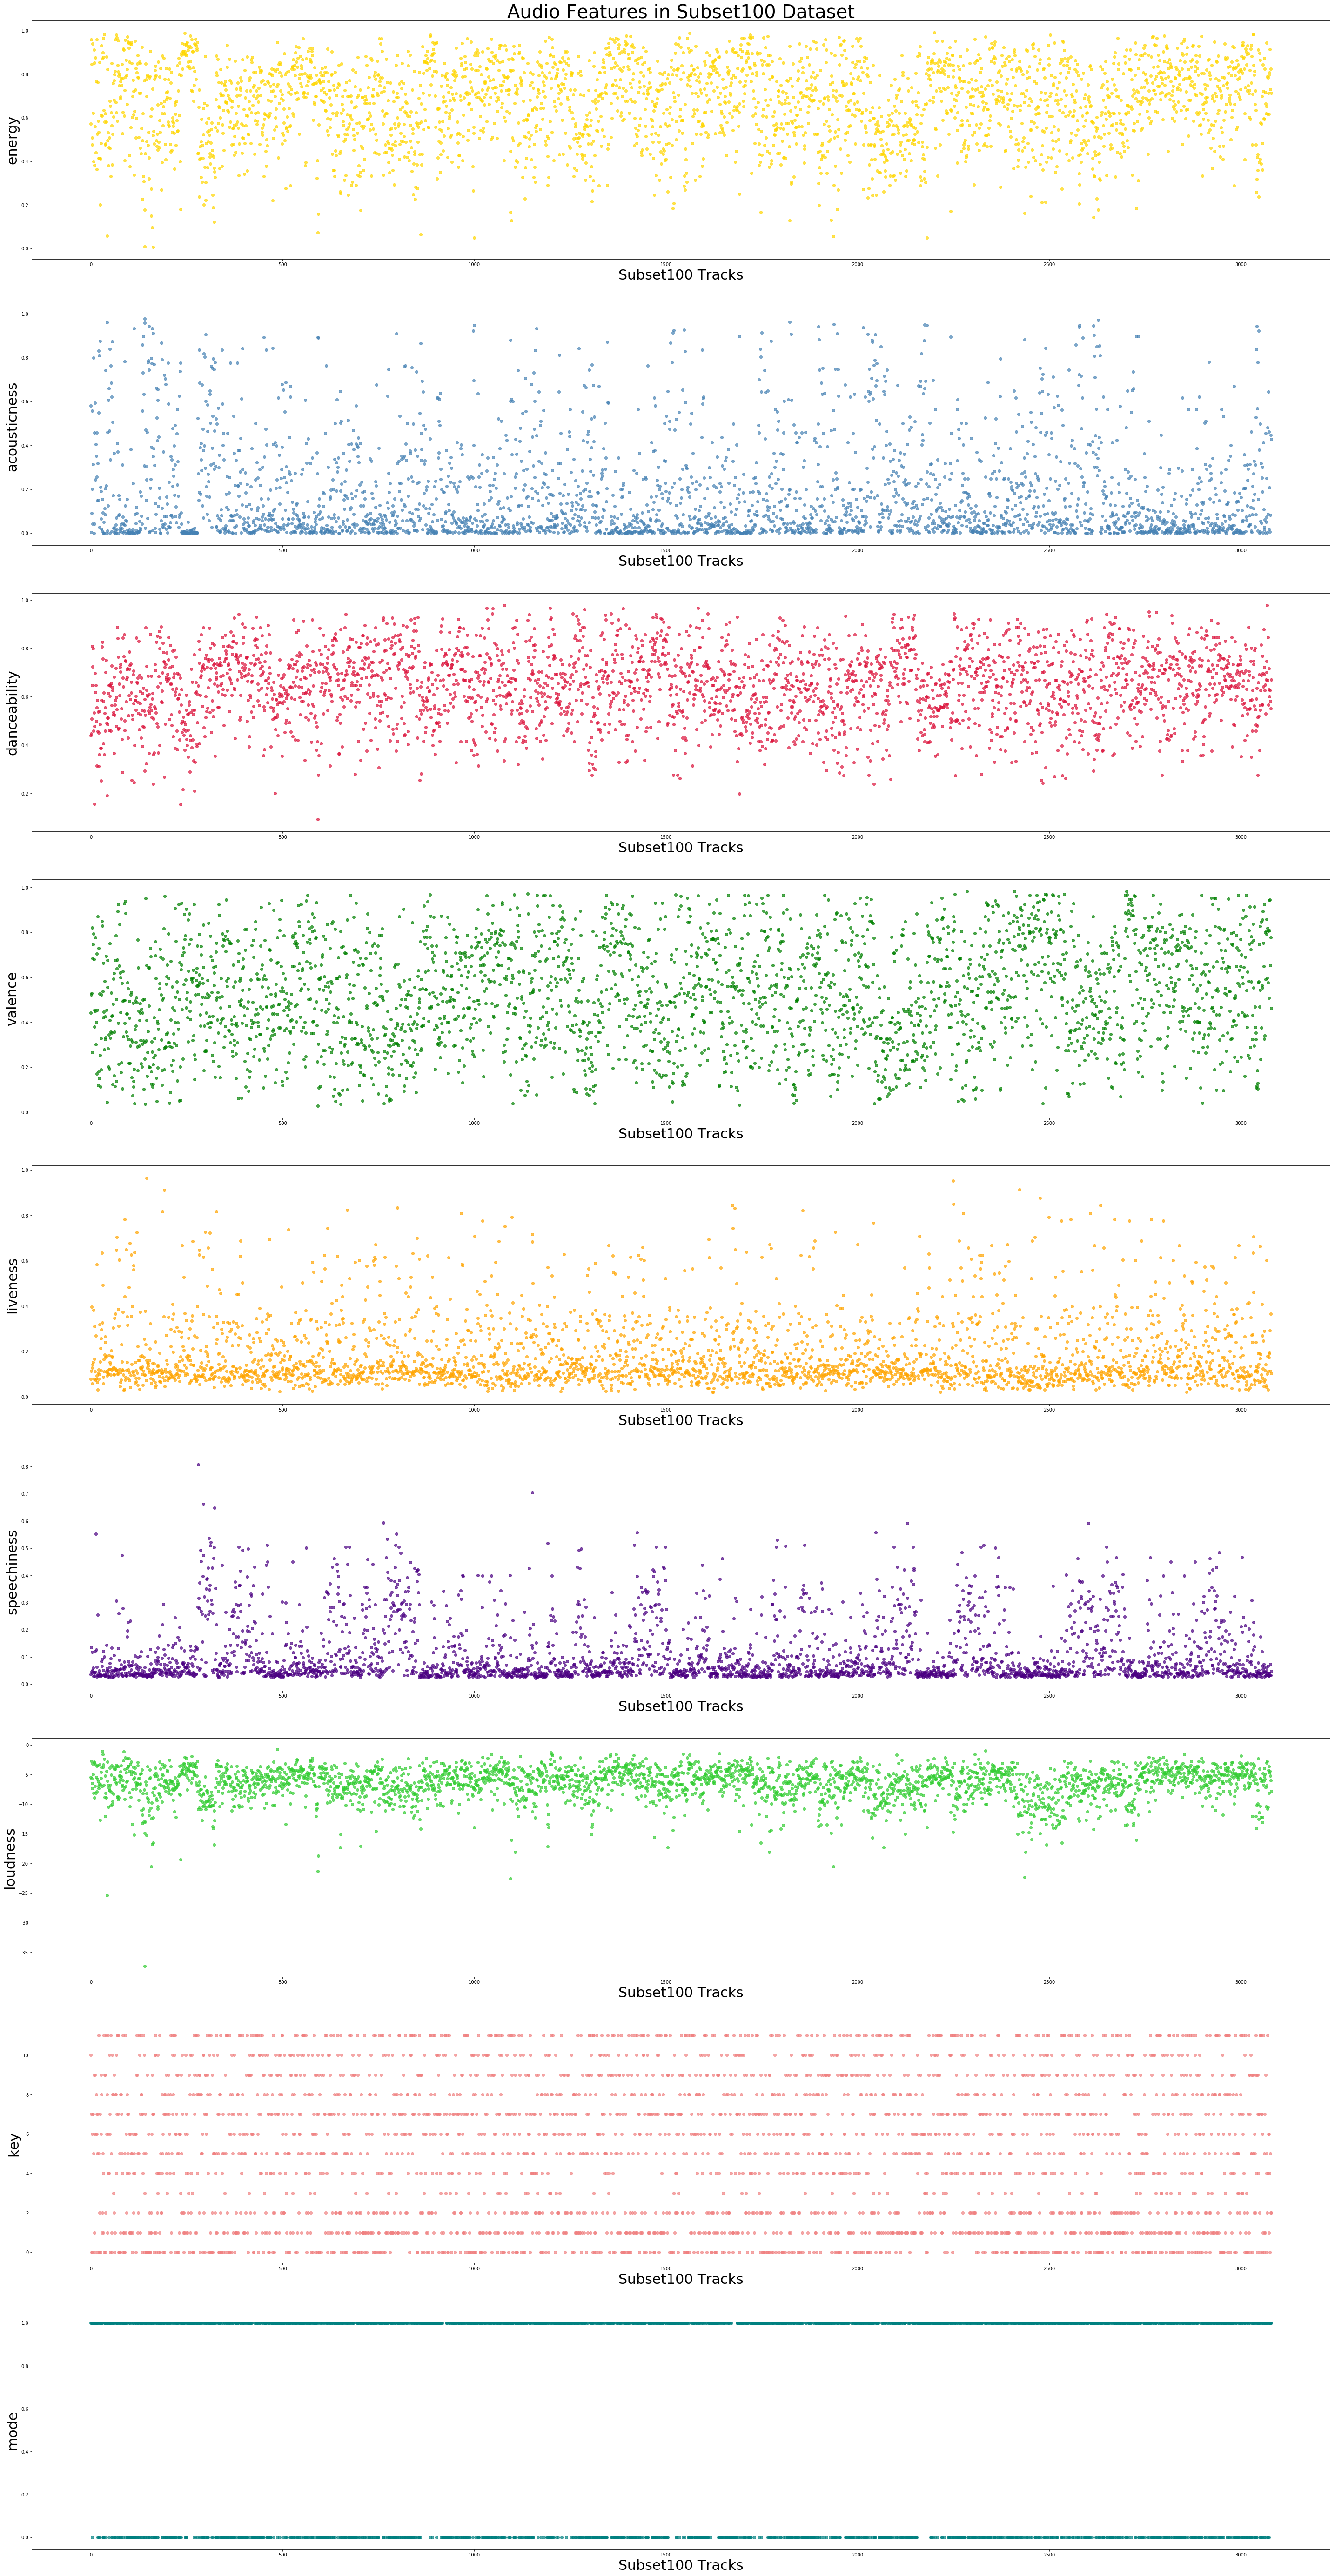

In [164]:
#Visualize Track Features in Subset100
cols = ['energy', 'acousticness', 'danceability', 'valence','liveness','speechiness', 'loudness', 'key', 'mode']
colors = ['gold','steelblue','crimson','g', 'orange', 'indigo', 'limegreen', 'lightcoral', 'teal']

fig3, ax = plt.subplots(len(cols),1,figsize = (50, 100))
for i in range(len(cols)):
    ax[i].scatter(range(len(subset)), subset[cols[i]], color = colors[i], alpha = 0.7)
    ax[i].set_ylabel(cols[i], fontsize = 30)
    ax[i].set_xlabel('Subset100 Tracks', fontsize = 30)
ax[0].set_title('Audio Features in Subset100 Dataset', fontsize = 40)
plt.show()

In [166]:
#save figure for report
fig3.savefig('Subset100_Tracks.jpg')